# Diabetes Prediction

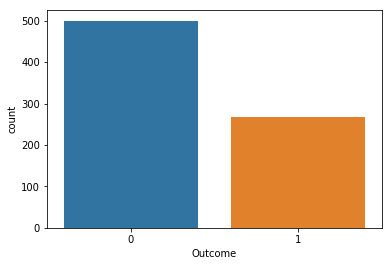

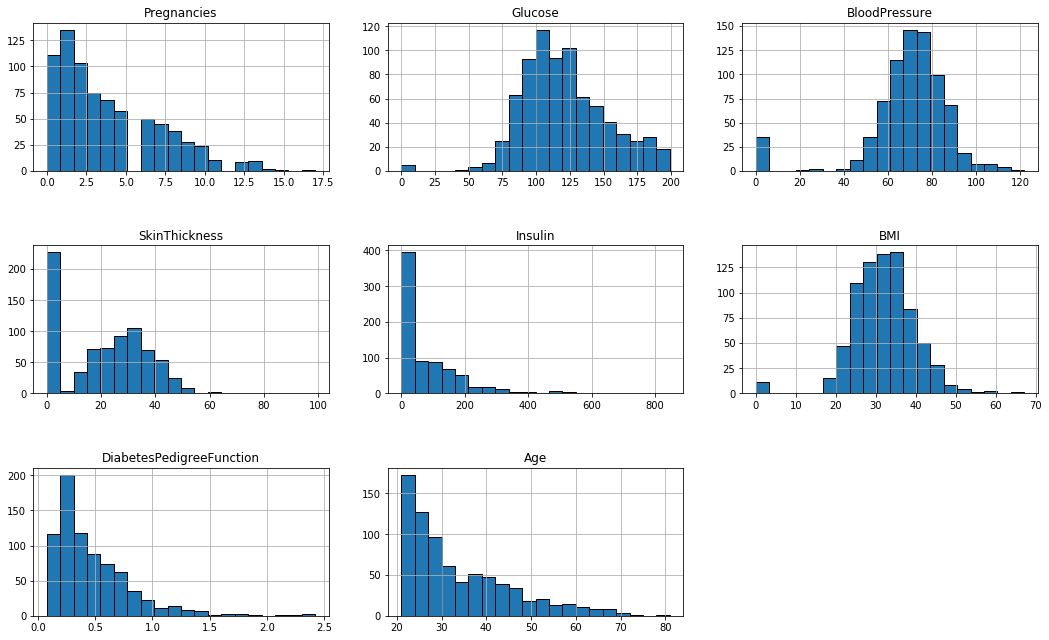

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
data=pd.read_csv('diabetes.csv')
data.isnull().sum()
sns.countplot(x='Outcome',data=data)
plt.show()

#data.head(2)
Y=data['Outcome']
X=data.drop(labels={'Outcome'},axis=1)
columns=data.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    X[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#X_train,y_train,X_test,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X_train, y_train)
        score = svc.score(X_train, y_train)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

C=best_params['C'] 
gamma=best_params['gamma'] 

model=svm.SVC(kernel='rbf',C=1,gamma=2**5)
model.fit(X_train,y_train)
pre=model.predict(X_test)
print('Accuracy for RBF SVM kernel is ',metrics.accuracy_score(pre,y_test))

lmodel=svm.SVC(kernel='linear',C=1,gamma=2**5)
lmodel.fit(X_train,y_train)
pre=lmodel.predict(X_test)
print('Accuracy for LINEAR SVM kernel is ',metrics.accuracy_score(pre,y_test))

lg=LogisticRegression()
lg.fit(X_train,y_train)
lgpre=lg.predict(X_test)
print('Accuracy for LR kernel is ',metrics.accuracy_score(lgpre,y_test))


decision=DecisionTreeClassifier()
decision.fit(X_train,y_train)
prediction=decision.predict(X_test)
print('Accuracy Decision Tree is',metrics.accuracy_score(prediction,y_test))


abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

Accuracy for RBF SVM kernel is  0.6770833333333334
Accuracy for LINEAR SVM kernel is  0.8020833333333334
Accuracy for LR kernel is  0.8072916666666666
Accuracy Decision Tree is 0.7395833333333334


,Accuracy
Linear Svm,0.802083
Radial Svm,0.677083
Logistic Regression,0.807292
Decision Tree,0.723958


# Feature Extraction/ Selection: Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=100)
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

# from sklearn.ensemble import ExtraTreesClassifier
# model=ExtraTreesClassifier(n_estimators=100,random_state=100)
# model.fit(X,Y)
# pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)


Glucose                     0.254544
BMI                         0.166491
Age                         0.135031
DiabetesPedigreeFunction    0.128524
BloodPressure               0.090378
Pregnancies                 0.085181
Insulin                     0.072415
SkinThickness               0.067435
dtype: float64

# Using Only Important Features And Standardisation

In [94]:
data2=data[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
from sklearn.preprocessing import StandardScaler
features=data2[data2.columns[:4]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
xnew=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
ynew=data2['Outcome']
Xnew_train,Xnew_test,ynew_train,ynew_test=train_test_split(xnew,ynew,test_size=0.25,random_state=0)
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier()]
for i in models:
    model=i;
    model.fit(Xnew_train,ynew_train)
    prediction=model.predict(Xnew_test)
    abc.append(metrics.accuracy_score(prediction,ynew_test))
new_models_dataframe=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns=['New Accuracy']   

new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Increase
Linear Svm,0.78125,-0.020833
Radial Svm,0.78125,0.104167
Logistic Regression,0.78125,-0.026042
Decision Tree,0.71875,-0.005208


# Cross Validation

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10,random_state=22)
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,data2[data2.columns[:4]],data2['Outcome'], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2


# box=pd.DataFrame(accuracy,index=[classifiers])
# sns.boxplot(box.T)
# plt.show()



,CV Mean
Linear Svm,0.781250
Radial Svm,0.781250
Logistic Regression,0.781250
Decision Tree,0.713542


# Test 

In [92]:
lg1=LogisticRegression()
lg1.fit(Xnew_train,ynew_train)
lg1pre=lg1.predict(Xnew_test)
print('Accuracy for LR kernel is ',metrics.accuracy_score(lg1pre,ynew_test))


lmodel=svm.SVC(kernel='linear',C=1,gamma=2**5)
lmodel.fit(X_train,y_train)
pre=lmodel.predict(X_test)
print('Accuracy for LINEAR SVM kernel is ',metrics.accuracy_score(pre,y_test))


Accuracy for LR kernel is  0.78125
Accuracy for LINEAR SVM kernel is  0.8020833333333334
